TO DO:
Sig figs for tables

Check if we calculate V or use recorded V

Find viscosity (mu) for our temperature in correct units

Try to set different markers graphs

Consider polyfit for plotting lines -- if plotting lines

Double check that pressure distribution looks right -- too tired rn

Clean up plots (use latex for subscripts, make everything big enough, etc)

Importing dependencies

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
np.set_printoptions(precision=4)

Getting data from .csv file

In [10]:
df = pd.read_csv('lab2_final_data.csv',header=[0,1], delimiter = ',',skiprows=1)

In [11]:
df.head() #here's the raw data from lab

,Data Point #,AOA,q_WT corrected,q_corr_fac,AmbTemp,AmbPress,Reynolds #,,x/c,1.0000,...,0.0500,0.1000,0.2000,0.3000,0.4000,0.5000,0.6000,0.7000,0.8000,1.0000
,#,[deg],[psid],[ND],[Rankine],[psia],[ND],,y/c,0.0000000,...,-0.0311500,-0.0351300,-0.0354800,-0.0314600,-0.0270700,-0.0226800,-0.0182800,-0.0138900,-0.0095000,0.0000000.1
0,1.0,-6.0,0.063145,0.907,530.37,14.24335,155288.421875,,p[psid],-0.008470,...,-0.113662,-0.059063,-0.033614,-0.022661,-0.015984,-0.011711,-0.007958,-0.004456,-0.001556,-0.008470
1,2.0,-4.0,0.062065,0.907,530.37,14.24335,153955.421875,,p[psid],-0.010099,...,-0.069702,-0.047304,-0.024676,-0.016212,-0.011166,-0.007979,-0.005252,-0.002553,-0.000445,-0.010099
2,3.0,-2.0,0.061935,0.907,530.37,14.24335,153793.781250,,p[psid],-0.007954,...,-0.042615,-0.030582,-0.019538,-0.013345,-0.005861,-0.003784,-0.002297,-0.000556,0.000751,-0.007954
3,4.0,0.0,0.062972,0.907,530.37,14.24335,155076.031250,,p[psid],-0.003698,...,-0.020469,-0.015280,-0.008770,-0.004511,-0.002051,-0.000560,0.000661,0.001981,0.003177,-0.003698
4,5.0,2.0,0.062932,0.907,530.37,14.24335,155026.890625,,p[psid],-0.004067,...,-0.004700,-0.004322,-0.001735,0.000677,0.001751,0.002475,0.003027,0.003699,0.004245,-0.004067


Calculating C_pi

In [12]:
column_names=df.columns #so we can use indexing to call columns of df

In [13]:
column_names

MultiIndex([(   'Data Point #',           '#'),
            (           ' AOA',      ' [deg]'),
            (' q_WT corrected',     ' [psid]'),
            (    ' q_corr_fac',       ' [ND]'),
            (       ' AmbTemp',  ' [Rankine]'),
            (      ' AmbPress',     ' [psia]'),
            (    ' Reynolds #',       ' [ND]'),
            (              ' ',           ' '),
            (            'x/c',         'y/c'),
            (         '1.0000',   '0.0000000'),
            (         '0.8000',   '0.0524800'),
            (         '0.7000',   '0.0734680'),
            (         '0.6000',   '0.0906050'),
            (         '0.5000',   '0.1027010'),
            (         '0.4000',   '0.1090320'),
            (         '0.3000',   '0.1084450'),
            (         '0.2000',   '0.1003600'),
            (         '0.1000',   '0.0753390'),
            (         '0.0500',   '0.0529490'),
            (         '0.0000',   '0.0000000'),
            (         '0.0500',  '-0.031

In [14]:
df[column_names[1]]

0     -6.0
1     -4.0
2     -2.0
3      0.0
4      2.0
5      4.0
6      6.0
7      8.0
8     10.0
9     12.0
10    14.0
11    16.0
12    18.0
13    20.0
14    22.0
15    24.0
16    26.0
17    24.0
18    22.0
19    20.0
20    18.0
21    16.0
22    14.0
23    12.0
24    10.0
25     8.0
26     6.0
27     4.0
28     2.0
29     0.0
30    -2.0
31    -4.0
32    -6.0
Name: ( AOA,  [deg]), dtype: float64

In [20]:
for i in range(21): #21 but note first and last will be same -- makes it easier for summing
    df['C_p'+str(i+1)]=df[column_names[i+9]]/df[column_names[2]] #getting appropriate dp, dividing by q_corr for that AOA, and adding it to a new C_p column named based on pressure tap number

In [21]:
df.head() #to check, can pick a C_p#, check it matches deltap/q for that # pressure tap and AOA

,Data Point #,AOA,q_WT corrected,q_corr_fac,AmbTemp,AmbPress,Reynolds #,,x/c,1.0000,...,C_p13,C_p14,C_p15,C_p16,C_p17,C_p18,C_p19,C_p20,C_p21,C_n
,#,[deg],[psid],[ND],[Rankine],[psia],[ND],,y/c,0.0000000,...,,,,,,,,,,
0,1.0,-6.0,0.063145,0.907,530.37,14.24335,155288.421875,,p[psid],-0.008470,...,-0.935366,-0.532340,-0.358881,-0.253141,-0.185455,-0.126023,-0.070575,-0.024643,-0.134137,0
1,2.0,-4.0,0.062065,0.907,530.37,14.24335,153955.421875,,p[psid],-0.010099,...,-0.762165,-0.397580,-0.261206,-0.179901,-0.128555,-0.084617,-0.041133,-0.007162,-0.162711,0
2,3.0,-2.0,0.061935,0.907,530.37,14.24335,153793.781250,,p[psid],-0.007954,...,-0.493768,-0.315459,-0.215468,-0.094628,-0.061104,-0.037092,-0.008984,0.012124,-0.128417,0
3,4.0,0.0,0.062972,0.907,530.37,14.24335,155076.031250,,p[psid],-0.003698,...,-0.242641,-0.139270,-0.071637,-0.032565,-0.008891,0.010503,0.031463,0.050454,-0.058717,0
4,5.0,2.0,0.062932,0.907,530.37,14.24335,155026.890625,,p[psid],-0.004067,...,-0.068682,-0.027563,0.010764,0.027817,0.039334,0.048101,0.058778,0.067455,-0.064625,0


In [22]:
column_names=df.columns #doing again to get new column names too

## Question 1

First, we'll make an array of x/c and y/c values that correspond with the ith data point

In [31]:
column_names

MultiIndex([(   'Data Point #',           '#'),
            (           ' AOA',      ' [deg]'),
            (' q_WT corrected',     ' [psid]'),
            (    ' q_corr_fac',       ' [ND]'),
            (       ' AmbTemp',  ' [Rankine]'),
            (      ' AmbPress',     ' [psia]'),
            (    ' Reynolds #',       ' [ND]'),
            (              ' ',           ' '),
            (            'x/c',         'y/c'),
            (         '1.0000',   '0.0000000'),
            (         '0.8000',   '0.0524800'),
            (         '0.7000',   '0.0734680'),
            (         '0.6000',   '0.0906050'),
            (         '0.5000',   '0.1027010'),
            (         '0.4000',   '0.1090320'),
            (         '0.3000',   '0.1084450'),
            (         '0.2000',   '0.1003600'),
            (         '0.1000',   '0.0753390'),
            (         '0.0500',   '0.0529490'),
            (         '0.0000',   '0.0000000'),
            (         '0.0500',  '-0.031

In [23]:
tap_positions=np.zeros((21, 2))
for i in range(20):
    tap_positions[i, 0]=float(column_names[i+9][0])
    tap_positions[i, 1]=float(column_names[i+9][1])
tap_positions[20,0]=1
tap_positions[20,1]=0

Calculating C_n with discretization in lab manual -- summing over pressure taps

In [38]:
df['C_n']=0 #initializing all C_n's to be zeros
for i in range(20):
    df['C_n']+=1/2*(df[column_names[i+30]]+df[column_names[i+31]])*(tap_positions[i+1,0]-tap_positions[i,0])

In [39]:
df['C_n'] #can check with calculations

0    -0.088681
1     0.102789
2     0.269863
3     0.483981
4     0.637118
5     0.823539
6     0.997992
7     1.158583
8     1.292409
9     1.373310
10    1.388076
11    1.366572
12    1.319518
13    0.919607
14    0.996583
15    1.025579
16    1.105942
17    1.039673
18    0.977122
19    0.923242
20    0.865519
21    0.802744
22    0.737675
23    1.375171
24    1.299113
25    1.168855
26    1.038385
27    0.867012
28    0.608648
29    0.454285
30    0.301804
31    0.111429
32   -0.076766
Name: C_n, dtype: float64

Calculating C_a with discretization in lab manual

Very similar process to C_n

In [40]:
df['C_a']=0 #initializing all C_a's to be zeros
for i in range(20):
    df['C_a']+=-1/2*(df[column_names[i+30]]+df[column_names[i+31]])*(tap_positions[i+1,1]-tap_positions[i,1])

In [41]:
df['C_a'] #check with calculations

0    -0.020534
1     0.010312
2     0.021709
3     0.015506
4    -0.000206
5    -0.024558
6    -0.057685
7    -0.104417
8    -0.152606
9    -0.208415
10   -0.231420
11   -0.247823
12   -0.165651
13    0.024483
14    0.021299
15    0.018364
16    0.013068
17    0.021098
18    0.023914
19    0.024455
20    0.029015
21    0.041962
22    0.048070
23   -0.213210
24   -0.157962
25   -0.110729
26   -0.067688
27   -0.031062
28    0.002280
29    0.016789
30    0.021318
31    0.012283
32   -0.018859
Name: C_a, dtype: float64

Calculating C_m,LE with discretization in lab manual but split into x and y components 

Very similar process to C_n and C_a

In [42]:
df['C_m,LEx']=0  #initializing to 0's again so can add to it when summing
df['C_m,LEy']=0
for i in range(20):
    df['C_m,LEx']+=1/2*(df[column_names[i+30]]*tap_positions[i,0]+df[column_names[i+31]]*tap_positions[i+1,0]) *(tap_positions[i,0]-tap_positions[i+1,0])
    df['C_m,LEy']+=1/2*(df[column_names[i+30]]*tap_positions[i,1]+df[column_names[i+31]]*tap_positions[i+1,1])*(tap_positions[i,1]-tap_positions[i+1,1])
df['C_m,LE']=df['C_m,LEx']+df['C_m,LEy']

In [43]:
df['C_m,LE'] #can check with calculations

0    -0.052700
1    -0.108378
2    -0.151185
3    -0.206877
4    -0.244837
5    -0.293558
6    -0.338431
7    -0.377283
8    -0.408399
9    -0.418368
10   -0.419452
11   -0.410372
12   -0.453396
13   -0.368680
14   -0.397705
15   -0.406582
16   -0.441308
17   -0.415972
18   -0.389893
19   -0.369921
20   -0.347798
21   -0.318856
22   -0.295613
23   -0.417350
24   -0.408902
25   -0.378242
26   -0.348141
27   -0.305206
28   -0.236405
29   -0.197482
30   -0.157963
31   -0.111644
32   -0.056337
Name: C_m,LE, dtype: float64

Finding C_l from C_n, C_a, and AOA as in lab manual

In [44]:
df['C_l']=df['C_n']*np.cos(np.deg2rad(df[column_names[1]]))-df['C_a']*np.sin(np.deg2rad(df[column_names[1]]))

In [45]:
df['C_l'] #can check with calculations

0    -0.090341
1     0.103258
2     0.270456
3     0.483981
4     0.636737
5     0.823246
6     0.998555
7     1.161840
8     1.299274
9     1.386632
10    1.402830
11    1.381943
12    1.306125
13    0.855775
14    0.916037
15    0.929444
16    0.988285
17    0.941207
18    0.897014
19    0.859200
20    0.814191
21    0.760080
22    0.704134
23    1.389449
24    1.306807
25    1.172891
26    1.039772
27    0.867067
28    0.608198
29    0.454285
30    0.302364
31    0.112014
32   -0.078317
Name: C_l, dtype: float64

Calculating C_m,c/4 from C_m,LE and C_l as in lab manual

In [46]:
df['C_m,c/4']=df['C_m,LE']+1/4*df['C_l']

In [47]:
df['C_m,c/4']

0    -0.075285
1    -0.082564
2    -0.083571
3    -0.085882
4    -0.085652
5    -0.087747
6    -0.088793
7    -0.086823
8    -0.083581
9    -0.071711
10   -0.068744
11   -0.064886
12   -0.126864
13   -0.154737
14   -0.168695
15   -0.174221
16   -0.194237
17   -0.180670
18   -0.165640
19   -0.155121
20   -0.144251
21   -0.128835
22   -0.119579
23   -0.069988
24   -0.082200
25   -0.085019
26   -0.088198
27   -0.088439
28   -0.084356
29   -0.083911
30   -0.082372
31   -0.083641
32   -0.075917
Name: C_m,c/4, dtype: float64

Calculated all the values for Question 1, will round to appropriate sig figs and put into table that can go into report

In [48]:
column_names=df.columns #doing again to get new column names too
df.head()

,Data Point #,AOA,q_WT corrected,q_corr_fac,AmbTemp,AmbPress,Reynolds #,,x/c,1.0000,...,C_p19,C_p20,C_p21,C_n,C_a,"C_m,LEx","C_m,LEy","C_m,LE",C_l,"C_m,c/4"
,#,[deg],[psid],[ND],[Rankine],[psia],[ND],,y/c,0.0000000,...,,,,,,,,,,
0,1.0,-6.0,0.063145,0.907,530.37,14.24335,155288.421875,,p[psid],-0.008470,...,-0.070575,-0.024643,-0.134137,-0.088681,-0.020534,-0.055745,0.003046,-0.052700,-0.090341,-0.075285
1,2.0,-4.0,0.062065,0.907,530.37,14.24335,153955.421875,,p[psid],-0.010099,...,-0.041133,-0.007162,-0.162711,0.102789,0.010312,-0.110239,0.001860,-0.108378,0.103258,-0.082564
2,3.0,-2.0,0.061935,0.907,530.37,14.24335,153793.781250,,p[psid],-0.007954,...,-0.008984,0.012124,-0.128417,0.269863,0.021709,-0.151700,0.000515,-0.151185,0.270456,-0.083571
3,4.0,0.0,0.062972,0.907,530.37,14.24335,155076.031250,,p[psid],-0.003698,...,0.031463,0.050454,-0.058717,0.483981,0.015506,-0.205654,-0.001223,-0.206877,0.483981,-0.085882
4,5.0,2.0,0.062932,0.907,530.37,14.24335,155026.890625,,p[psid],-0.004067,...,0.058778,0.067455,-0.064625,0.637118,-0.000206,-0.242077,-0.002759,-0.244837,0.636737,-0.085652


In [49]:
Q1table=df[[column_names[1], column_names[51], column_names[52], column_names[53], column_names[54], column_names[56], column_names[57]]]

In [52]:
Q1table.set_index(column_names[1])

,C_n,C_a,"C_m,LEx","C_m,LEy",C_l,"C_m,c/4"
,,,,,,
"( AOA, [deg])",,,,,,
-6.0,-0.088681,-0.020534,-0.055745,0.003046,-0.090341,-0.075285
-4.0,0.102789,0.010312,-0.110239,0.001860,0.103258,-0.082564
-2.0,0.269863,0.021709,-0.151700,0.000515,0.270456,-0.083571
0.0,0.483981,0.015506,-0.205654,-0.001223,0.483981,-0.085882
2.0,0.637118,-0.000206,-0.242077,-0.002759,0.636737,-0.085652
4.0,0.823539,-0.024558,-0.288899,-0.004659,0.823246,-0.087747
6.0,0.997992,-0.057685,-0.331807,-0.006625,0.998555,-0.088793
8.0,1.158583,-0.104417,-0.368634,-0.008649,1.161840,-0.086823


In [53]:
Q1table = Q1table.round(4)

In [54]:
Q1table.to_excel('Lab2Q1.xlsx')

## Question 2

Do we calculate V or use recorded V from handwritten data sheet? They're close

Assuming density constant -- I think we can and only way I can think of to find V

First, will find density using Ideal Gas Law -- need to check units of R!!!!

In [58]:
R_in=20604 #in-lbf/slug-R
R_ft=1717 #ft-lbf/slug-R
c=3.5/12 #feet
mu=3.737*10**(-7) #slug/ft^3 -- assumed sea level conditions -- might want to change it to based on temp
gamma=1.4

In [67]:
df['rho']=df[column_names[5]]/(R_in*df[column_names[4]])*12**3 #in slug/ft^3

Next, we found the velocity from the dynamic pressure equation

In [69]:
df['V']=np.sqrt(2*df[column_names[2]]*144/df['rho']) #in ft/s

In [70]:
df['V'] #match up pretty well with velocity recorded on hand-written data sheet

0     89.856946
1     89.085624
2     88.992062
3     89.734054
4     89.705622
5     89.059999
6     90.648439
7     90.037348
8     90.705832
9     90.552890
10    88.651592
11    88.197883
12    88.480143
13    89.459610
14    89.593512
15    89.122792
16    89.376598
17    91.895654
18    90.634473
19    92.187467
20    89.940369
21    90.128407
22    90.591150
23    90.326318
24    91.327012
25    90.627489
26    92.063034
27    89.642096
28    90.938279
29    90.850776
30    91.589648
31    90.607169
32    89.679817
Name: V, dtype: float64

Calculate Reynold's number

In [71]:
df['Re']=df['rho']*df['V']*c/mu

In [72]:
df['Re']

0     157957.680907
1     156601.789432
2     156437.317763
3     157741.651731
4     157691.670079
5     156556.744157
6     159349.029086
7     158274.805860
8     159449.920174
9     159181.066144
10    155838.812970
11    155041.247867
12    155537.426726
13    157259.212279
14    157494.595532
15    156667.126214
16    157113.286186
17    161541.482549
18    159324.478351
19    162054.456014
20    158104.327170
21    158434.876101
22    159248.322205
23    158782.779655
24    160541.878487
25    159312.201564
26    161835.716219
27    157579.999688
28    159858.532944
29    159704.714350
30    161003.561740
31    159276.481895
32    157646.309607
Name: Re, dtype: float64

Calculate Mach number

In [74]:
df['Ma']=df['V']/np.sqrt(1.4*R_ft*df[column_names[4]])

In [75]:
df['Ma']

0     0.079582
1     0.078899
2     0.078816
3     0.079473
4     0.079448
5     0.078876
6     0.080283
7     0.079741
8     0.080333
9     0.080198
10    0.078514
11    0.078112
12    0.078362
13    0.079230
14    0.079348
15    0.078931
16    0.079156
17    0.081387
18    0.080270
19    0.081646
20    0.079656
21    0.079822
22    0.080232
23    0.079997
24    0.080884
25    0.080264
26    0.081535
27    0.079391
28    0.080539
29    0.080462
30    0.081116
31    0.080246
32    0.079425
Name: Ma, dtype: float64

Calculated all the values for Question 2, will round to appropriate sig figs and put into table that can go into report

In [76]:
column_names=df.columns #doing again to get new column names too
df.head()

,Data Point #,AOA,q_WT corrected,q_corr_fac,AmbTemp,AmbPress,Reynolds #,,x/c,1.0000,...,C_a,"C_m,LEx","C_m,LEy","C_m,LE",C_l,"C_m,c/4",rho,V,Re,Ma
,#,[deg],[psid],[ND],[Rankine],[psia],[ND],,y/c,0.0000000,...,,,,,,,,,,
0,1.0,-6.0,0.063145,0.907,530.37,14.24335,155288.421875,,p[psid],-0.008470,...,-0.020534,-0.055745,0.003046,-0.052700,-0.090341,-0.075285,0.002252,89.856946,157957.680907,0.079582
1,2.0,-4.0,0.062065,0.907,530.37,14.24335,153955.421875,,p[psid],-0.010099,...,0.010312,-0.110239,0.001860,-0.108378,0.103258,-0.082564,0.002252,89.085624,156601.789432,0.078899
2,3.0,-2.0,0.061935,0.907,530.37,14.24335,153793.781250,,p[psid],-0.007954,...,0.021709,-0.151700,0.000515,-0.151185,0.270456,-0.083571,0.002252,88.992062,156437.317763,0.078816
3,4.0,0.0,0.062972,0.907,530.37,14.24335,155076.031250,,p[psid],-0.003698,...,0.015506,-0.205654,-0.001223,-0.206877,0.483981,-0.085882,0.002252,89.734054,157741.651731,0.079473
4,5.0,2.0,0.062932,0.907,530.37,14.24335,155026.890625,,p[psid],-0.004067,...,-0.000206,-0.242077,-0.002759,-0.244837,0.636737,-0.085652,0.002252,89.705622,157691.670079,0.079448


In [77]:
Q2table=df[[column_names[2], column_names[59], column_names[60], column_names[61]]]

In [78]:
Q2table.set_index(column_names[2])

,V,Re,Ma
,,,
"( q_WT corrected, [psid])",,,
0.063145,89.856946,157957.680907,0.079582
0.062065,89.085624,156601.789432,0.078899
0.061935,88.992062,156437.317763,0.078816
0.062972,89.734054,157741.651731,0.079473
0.062932,89.705622,157691.670079,0.079448
0.062029,89.059999,156556.744157,0.078876
0.064262,90.648439,159349.029086,0.080283
0.063398,90.037348,158274.805860,0.079741


In [79]:
Q2table = Q2table.round(4)

In [80]:
Q2table.to_excel('Lab2Q2.xlsx')

## Question 3

Try to set different markers

Consider polyfit for plotting lines -- if plotting lines

Double check that pressure distribution looks right -- too tired rn

In [87]:
cp_neg4=np.zeros(21)
cp_0=np.zeros(21)
cp_4=np.zeros(21)
cp_8=np.zeros(21)
cp_12=np.zeros(21)
for i in range(21):
    cp_neg4[i]=df[column_names[i+30]][1]
    cp_0[i]=df[column_names[i+30]][3]
    cp_4[i]=df[column_names[i+30]][5]
    cp_8[i]=df[column_names[i+30]][7]
    cp_12[i]=df[column_names[i+30]][9]

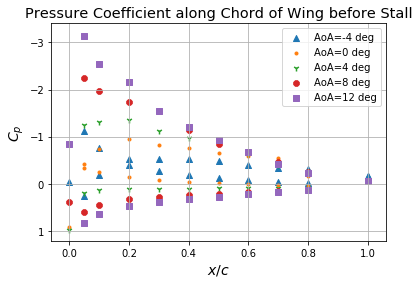

In [117]:
ax = plt.gca()
#ax.scatter(tap_positions[:,0], cp_neg4, 'o', label='AoA=-4 deg')
#ax.scatter(tap_positions[:,0], cp_0, '+', label='AoA=0 deg')
#ax.scatter(tap_positions[:,0], cp_4, '*', label='AoA=4 deg')
#ax.scatter(tap_positions[:,0], cp_8, 'x', label='AoA=8 deg')
#ax.scatter(tap_positions[:,0], cp_12, 's', label='AoA=12 deg')
ax.scatter(tap_positions[:,0], cp_neg4, label='AoA=-4 deg',marker='^')
#ax.plot(tap_positions[:,0], cp_neg4)
ax.scatter(tap_positions[:,0], cp_0, label='AoA=0 deg',marker='.')
#ax.plt(tap_positions[:,0], cp_0)
ax.scatter(tap_positions[:,0], cp_4, label='AoA=4 deg',marker='1')
#ax.plot(tap_positions[:,0], cp_4)
ax.scatter(tap_positions[:,0], cp_8, label='AoA=8 deg',marker='8')
#ax.plt(tap_positions[:,0], cp_8)
ax.scatter(tap_positions[:,0], cp_12, label='AoA=12 deg',marker='s')
#ax.plt(tap_positions[:,0], cp_12)
ax.set_xlabel('$x/c$',fontsize=14)
ax.set_ylabel('$C_p$',fontsize=14)
ax.legend()
ax.set_title('Pressure Coefficient along Chord of Wing before Stall',fontsize=14.5)
ax.grid()
plt.gca().invert_yaxis()
plt.savefig('Lab2Q3.png')

## Question 4 -- similar to 3

In [92]:
cp_16=np.zeros(21)
cp_20=np.zeros(21)
cp_24=np.zeros(21)
for i in range(21):
    cp_16[i]=df[column_names[i+30]][11]
    cp_20[i]=df[column_names[i+30]][13]
    cp_24[i]=df[column_names[i+30]][15]

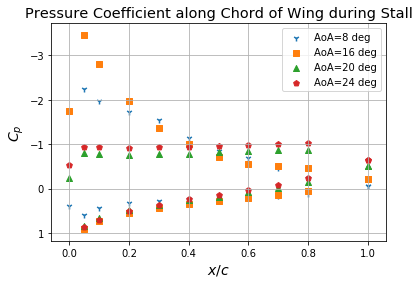

In [118]:
ax = plt.gca()
#ax.scatter(tap_positions[:,0], cp_8, 'o', label='AoA=8 deg')
#ax.scatter(tap_positions[:,0], cp_16, '+', label='AoA=16 deg')
#ax.scatter(tap_positions[:,0], cp_20, '*', label='AoA=20 deg')
#ax.scatter(tap_positions[:,0], cp_24, 'x', label='AoA=24 deg')
ax.scatter(tap_positions[:,0], cp_8, label='AoA=8 deg',marker='1')
#ax.plot(tap_positions[:,0], cp_8)
ax.scatter(tap_positions[:,0], cp_16, label='AoA=16 deg',marker='s')
#ax.plt(tap_positions[:,0], cp_16)
ax.scatter(tap_positions[:,0], cp_20, label='AoA=20 deg',marker='^')
#ax.plot(tap_positions[:,0], cp_20)
ax.scatter(tap_positions[:,0], cp_24, label='AoA=24 deg',marker='p')
#ax.plt(tap_positions[:,0], cp_24)
ax.set_xlabel('$x/c$',fontsize=14)
ax.set_ylabel('$C_p$',fontsize=14)
ax.legend()
ax.set_title('Pressure Coefficient along Chord of Wing during Stall',fontsize=14.5)
ax.grid()
plt.gca().invert_yaxis()
plt.savefig('Lab2Q4.png')

## Question 5

In [119]:
AoAin=np.array([df[column_names[1]][:17]])
C_lin=np.array([df['C_l'][:17]])
AoAde=np.array([df[column_names[1]][17:]])
C_lde=np.array(df['C_l'][17:])

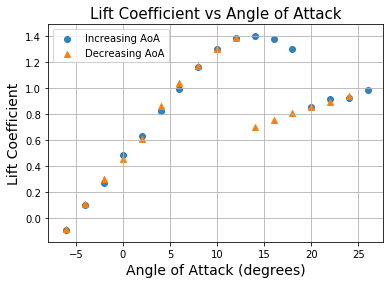

In [133]:
plt.scatter(AoAin, C_lin, label='Increasing AoA',alpha=0.9)
plt.scatter(AoAde, C_lde, label='Decreasing AoA',marker='^')
plt.legend()
plt.xlabel('Angle of Attack (degrees)',fontsize=14)
plt.ylabel('Lift Coefficient',fontsize=14)
plt.title('Lift Coefficient vs Angle of Attack',fontsize=15)
plt.grid()
plt.savefig('Lab2Q5.png')

 ## Question 6

In [134]:
AoAin=np.array([df[column_names[1]][:17]])
C_qcmin=np.array([df['C_m,c/4'][:17]])
AoAde=np.array([df[column_names[1]][17:]])
C_qcmde=np.array(df['C_m,c/4'][17:])

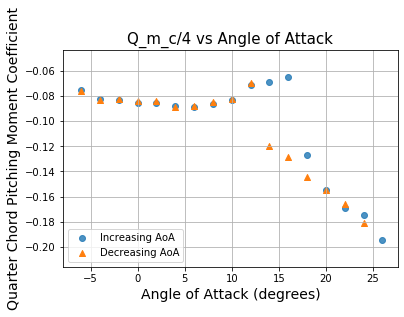

In [136]:
plt.scatter(AoAin, C_qcmin, label='Increasing AoA',alpha=0.8)
plt.scatter(AoAde, C_qcmde, label='Decreasing AoA',marker='^')
plt.legend(loc='lower left')
plt.xlabel('Angle of Attack (degrees)',fontsize=14)
plt.ylabel('Quarter Chord Pitching Moment Coefficient',fontsize=14)
plt.title('Q_m_c/4 vs Angle of Attack',fontsize=15)
plt.grid()
plt.savefig('Lab2Q6.png')